In [1]:

from ex2func import *

data=np.loadtxt('c:\python\ex2data2.txt', delimiter=',')
print(data.shape)
X=data[:,0:2]
y=data[:,-1]
plotData(X,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microship Test 2')
plt.legend(('y=1','y=0'),loc='upper right')

(118, 3)


In [2]:
def mapFeature(x1,x2):
    degree=6
    m=np.size(x1)
    out=np.ones(m)
    res=[]
    res.append(out)
    for i in np.arange(1, degree+1):
        for j in np.arange(0,i+1):
            out1=(x1**(i-j))*(x2**j)
            res.append(out1)
    return np.array(res).T

In [3]:
def costFunctionReg(theta,X,y,s_lambda):
    m,n=X.shape
    J=0
    grad=np.zeros(np.size(theta))
    sum_theta_square=np.sum(theta[1:]**2)
    
    X_theta = X.dot(theta)
    prediction = sigmoid(X_theta)
    
    J=1/m*np.sum(-y*np.log(prediction)-(1-y)*np.log(1-prediction))+s_lambda/(2*m)*sum_theta_square
    error=prediction - y
    delta=1/m*error.T.dot(X)
    
    temp=theta
    temp[0]=0
    regular=(s_lambda/m)*temp
    grad = delta + regular
    return J, grad

In [4]:
X_reg=mapFeature(X[:,0],X[:,1])
X_reg.shape
#print(X_reg[0:2,:])

(118, 28)

In [5]:
initial_theta=np.zeros(X_reg.shape[1])
s_lambda=1
cost,grad=costFunctionReg(initial_theta,X_reg,y,s_lambda)
print('Cost at initial theta (zeros): %f' %cost)
print('Gradient at initial theta (zeros):')
print(grad)


Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros):
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [6]:
import scipy.optimize as op

initial_theta=np.zeros(X_reg.shape[1])
s_lambda=1
costFunc=lambda p: costFunctionReg(p,X_reg,y,s_lambda)[0]
gradFunc=lambda p: costFunctionReg(p,X_reg,y,s_lambda)[1]

Result=op.minimize(fun=costFunc,x0=initial_theta,method='CG',jac=gradFunc, options={'maxiter':400})
print(Result)
cost=Result.fun
theta=Result.x

     fun: 0.5290027310062188
     jac: array([-2.94778982e-07, -1.51979795e-06,  2.34229010e-06,  1.85216828e-06,
       -2.39378843e-06,  4.28882734e-06, -1.35440775e-06,  1.53200589e-06,
       -1.93768583e-07,  7.98191416e-07, -1.50251335e-07, -1.50619761e-06,
        4.86211527e-07, -9.80415080e-07,  1.85526835e-06, -1.27803621e-06,
        7.29821700e-07, -6.57848013e-07,  3.56953956e-07, -2.89416931e-08,
       -2.66113843e-07, -8.48674847e-07, -7.48055041e-07,  1.26072592e-07,
       -6.66923335e-07,  2.79432524e-07, -6.00947406e-07,  2.20231309e-07])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 19
    njev: 55
  status: 0
 success: True
       x: array([ 1.2726322 ,  0.62526851,  1.18110054, -2.01977776, -0.91750969,
       -1.43140105,  0.12396937, -0.36542088, -0.35720348, -0.17516018,
       -1.45817405, -0.05109747, -0.61556197, -0.2747374 , -1.19275643,
       -0.24225813, -0.20594332, -0.04478629, -0.27777193, -0.29534671,
       -0.45647333, -

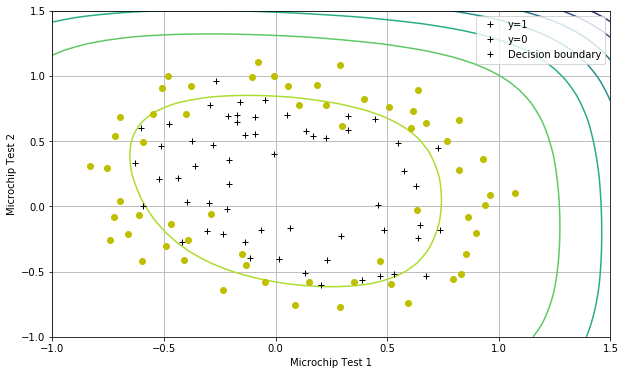

In [7]:
plotDecisionBoundary(theta,X_reg,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(('y=1','y=0','Decision boundary'),loc='upper right')

In [9]:
p=predict01(theta,X_reg)

print('Train Accuracy: ',np.mean(np.double(p==y))*100)

Train Accuracy:  83.05084745762711
